# Assignment 4: Neural Networks

---

## Task 1) Skip-grams

Tomas Mikolov's [original paper](https://arxiv.org/abs/1301.3781) for word2vec is not very specific on how to actually compute the embedding matrices.
Xin Ron provides a much more detailed [walk-through](https://arxiv.org/pdf/1411.2738.pdf) of the math, I recommend you go through it before you continue with this assignment.
Now, while the original implementation was in C and estimates the matrices directly, in this assignment, we want to use PyTorch (and autograd) to train the matrices.
There are plenty of example implementations and blog posts out there that show how to do it, I particularly recommend [Mateusz Bednarski's](https://towardsdatascience.com/implementing-word2vec-in-pytorch-skip-gram-model-e6bae040d2fb) version. Familiarize yourself with skip-grams and how to train them using pytorch.

### Data

Download the `theses.csv` data set from the `Supplemental Materials` in the `Files` section of our Microsoft Teams group.
This dataset consists of approx. 3,000 theses topics chosen by students in the past.
Here are some examples of the file content:

```
27.10.94;14.07.95;1995;intern;Diplom;DE;Monte Carlo-Simulation für ein gekoppeltes Round-Robin-System;
04.11.94;14.03.95;1995;intern;Diplom;DE;Implementierung eines Testüberdeckungsgrad-Analysators für RAS;
01.11.20;01.04.21;2021;intern;Bachelor;DE;Landessprachenerkennung mittels X-Vektoren und Meta-Klassifikation;
```

### Basic Setup

For the upcoming assignments on Neural Networks, we'll be heavily using [PyTorch](https://pytorch.org) as go-to Deep Learning library.
If you're not already familiar with PyTorch, now's the time to get started with it.
Head over to the [Basics](https://pytorch.org/tutorials/beginner/basics/intro.html) and gain some understanding about the essentials.
Before starting this assignment, make sure you've got PyTorch installed in your working environment. 
It's a quick setup, and you'll find all the instructions you need on the PyTorch website.
As always, you can use [NumPy](https://numpy.org) and [Pandas](https://pandas.pydata.org) for data handling etc.

*In this Jupyter Notebook, we will provide the steps to solve this task and give hints via functions & comments. However, code modifications (e.g., function naming, arguments) and implementation of additional helper functions & classes are allowed. The code aims to help you get started.*

---

In [14]:
%pip install torch numpy matplotlib scikit-learn pandas


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Dependencies
import numpy as np
import pandas as pd


### Prepare the Data

1.1 Spend some time on preparing the dataset. It may be helpful to lower-case the data and to filter for German titles. The format of the CSV-file should be:

```
Anmeldedatum;Abgabedatum;JahrAkademisch;Art;Grad;Sprache;Titel;Abstract
```

1.2 Create the vocabulary from the prepared dataset. You'll need it for the initialization of the matrices and to map tokens to indices.

1.3 Generate the training pairs with center word and context word. Which window size do you choose?

In [16]:
def load_theses_dataset(filepath):
    """Loads all theses instances and returns them as a dataframe."""
    ### YOUR CODE HERE
   
    
    
    data= pd.read_csv(filepath, sep='\t', encoding='utf-8', header=None)
    data = data[3].to_list()
    return data
    
    ### END YOUR CODE

In [17]:
def preprocess(dataframe):
    """Preprocesses and tokenizes the given theses titles for further use."""
    ### YOUR CODE HERE
    # Tokenize the titles
    # Remove special characters
    # Convert to lowercase

    for i in range(len(dataframe)):
        dataframe[i] = dataframe[i].lower()
        dataframe[i] = dataframe[i].replace("'", "")
        dataframe[i] = dataframe[i].replace('"', "")
        dataframe[i] = dataframe[i].replace("(", "")
        dataframe[i] = dataframe[i].replace(")", "")
        dataframe[i] = dataframe[i].replace(",", "")
        dataframe[i] = dataframe[i].replace(".", "")
        dataframe[i] = dataframe[i].replace("!", "")
        dataframe[i] = dataframe[i].replace("?", "")
        dataframe[i] = dataframe[i].replace(":", "")
        dataframe[i] = dataframe[i].replace(";", "")
        dataframe[i] = dataframe[i].replace("-", " ")
        dataframe[i] = dataframe[i].replace("_", " ")   
        dataframe[i] = dataframe[i].replace("  ", " ")

    # Tokenize the titles
    for i in range(len(dataframe)):
        dataframe[i] = dataframe[i].split(" ")
    # Remove empty strings
    for i in range(len(dataframe)):
        dataframe[i] = list(filter(None, dataframe[i]))
    


    ### END YOUR CODE

In [18]:
def cerate_vocab(dataframe):
    """Creates a vocabulary from the given dataframe."""
    ### YOUR CODE HERE
    # Create a vocabulary from the tokenized titles
    vocab = set()
    for title in dataframe:
        for word in title:
            vocab.add(word)
    return vocab
    ### END YOUR CODE

In [32]:
def create_training_pairs(data, word2idx, window_size):
    """Creates training pairs based on skip-grams for further use."""
    ### YOUR CODE HERE
    # Create training pairs based on skip-grams
    training_pairs = []

    for title in data:
        for i, word in enumerate(title):
            # Get the context words
            start = max(0, i - window_size)
            end = min(len(title), i + window_size + 1)
            context_words = title[start:end]
            print("words",context_words)
            context_words.remove(word)
            print("withput word", context_words)
            for context_word in context_words:
                training_pairs.append((word2idx[word], word2idx[context_word]))
    return training_pairs
    ### END YOUR CODE

In [31]:
dataframe = load_theses_dataset("data/theses.tsv")
preprocess(dataframe)
vocabulary = cerate_vocab(dataframe)
word2idx = {word: idx for idx, word in enumerate(vocabulary)}
idx2word = {idx: word for idx, word in enumerate(vocabulary)}
training_pairs_main = create_training_pairs(dataframe, word2idx, window_size=2)

words ['email', 'am', 'beispiel']
withput word ['am', 'beispiel']
words ['email', 'am', 'beispiel', 'smtp']
withput word ['email', 'beispiel', 'smtp']
words ['email', 'am', 'beispiel', 'smtp', 'im']
withput word ['email', 'am', 'smtp', 'im']
words ['am', 'beispiel', 'smtp', 'im', 'internet']
withput word ['am', 'beispiel', 'im', 'internet']
words ['beispiel', 'smtp', 'im', 'internet']
withput word ['beispiel', 'smtp', 'internet']
words ['smtp', 'im', 'internet']
withput word ['smtp', 'im']
words ['einführung', 'des', 'configuration']
withput word ['des', 'configuration']
words ['einführung', 'des', 'configuration', 'management']
withput word ['einführung', 'configuration', 'management']
words ['einführung', 'des', 'configuration', 'management', 'systems']
withput word ['einführung', 'des', 'management', 'systems']
words ['des', 'configuration', 'management', 'systems', 'pcms']
withput word ['des', 'configuration', 'systems', 'pcms']
words ['configuration', 'management', 'systems', 'pcm

In [30]:
print(training_pairs_main[0:10])

[(7051, 3199), (7051, 6056), (3199, 7051), (3199, 6056), (3199, 4560), (6056, 7051), (6056, 3199), (6056, 4560), (6056, 5671), (4560, 3199)]


In [44]:
print(vocabulary)

{'noch', 'sammlung', 'standardisieren', 'austausch', 'proprietäres', 'docker', 'neighbor', 'webdatenbanken', 'beispel', 'replikationsstrategien', 'hadoop', 'differenz', 'stands', 'freemium', 'sentiment', 'straßen', 'bildverarbeitungs', 'verteilt', 'gesundheitswesen', 'performanter', 'aware', 'standardisierten', '„fall', 'mutterkonzern', 'ereignis', 'point', 'mobiles', 'assistent', 'dokumentenähnlichkeiten', 'präventiver', 'mechanismen', 'schaltplänen', 'werkers', 'beobachtung', 'programmiersprachenunabhängigen', 'mongodb', 'codierungsmethoden', 'kundenlösungen', 'konfigurationsverteilung', 'protokollbäumen', 'werkes', 'spannungsfeld', 'beschreibenden', 'sw', 'einholen', 'gamification', 'activemovietm', 'gerber', 'produktionsfigurationen', 'komprimierung', 'offnerer', 'sendern', 'audits', 'suchmaschinen', 'deeplearning', 'unternehmen', 'diagrammen', 'vergleichs', 'geschäftsvorfälle', 'werkzeugunterstützte', 'höreindrucks', 'verdichtung', 'kameragestützte', 'kurzmitteilungsdienstes', 'ua

### Train and Analyze

2.1 Implement and train the word2vec model with your training data.

2.2 Implement a method to find the top-k similar words for a given word (token).

2.3 Analyze: What are the most similar words to "Konzeption", "Cloud" and "virtuelle"?

In [33]:
for word, context in training_pairs_main:
    if word >= len(vocabulary) or context >= len(vocabulary):
        print(f"Ungültiges Paar: ({word}, {context})")

In [39]:
### TODO: 2.1 Implement and train the word2vec model.

### YOUR CODE HERE
import torch
import torch.nn as nn
import torch.optim as optim

class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.target_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.context_embeddings = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, target_words):
        # Embedding für Zielwort
        target_embeds = self.target_embeddings(target_words)  # [batch_size, embed_dim]

        # Kontext-Embeddings (alle Wörter im Vokabular)
        context_embeds = self.context_embeddings.weight      # [vocab_size, embed_dim]

        # Skalarprodukt (scores)
        scores = torch.matmul(target_embeds, context_embeds.T)  # [batch_size, vocab_size]

        return scores

def train_skipgram(model, training_pairs, epochs=10, lr=0.01):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_function = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        total_loss = 0
        for target, context in training_pairs:
            model.zero_grad()

            target_tensor = torch.tensor([target], dtype=torch.long)
            context_tensor = torch.tensor([context], dtype=torch.long)

            scores = model(target_tensor)

            loss = loss_function(scores, context_tensor)
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(training_pairs)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# Beispiel (ersetze mit deinen realen Daten):
vocab_size = len(vocabulary)
embedding_dim = 100
model = SkipGram(vocab_size, embedding_dim)

train_skipgram(model, training_pairs_main, epochs=10, lr=0.01)


### END YOUR CODE

Epoch 1/10, Loss: 21.5805
Epoch 2/10, Loss: 15.7093
Epoch 3/10, Loss: 13.3420
Epoch 4/10, Loss: 11.7730
Epoch 5/10, Loss: 10.6068
Epoch 6/10, Loss: 9.6950
Epoch 7/10, Loss: 8.9641
Epoch 8/10, Loss: 8.3691
Epoch 9/10, Loss: 7.8795
Epoch 10/10, Loss: 7.4729


In [45]:
### TODO: 2.2 Implement a method to find the top-k similar words.

### YOUR CODE HERE

import torch
import torch.nn.functional as F
word_to_find = word2idx["cloud"]  

def find_top_k_similar(model:SkipGram, word_index, index_to_word, k=5):
    """
    Find top-k similar words based on cosine similarity.

    Args:
        model: Trained SkipGram model.
        word_index: Numeric index of the word.
        index_to_word: Dictionary mapping indices to words.
        k: Number of top similar words to return.

    Returns:
        List of tuples: (word, similarity_score)
    """
    with torch.no_grad():
        word_embed = model.target_embeddings(torch.tensor(word_index))
        all_embeddings = model.target_embeddings.weight
        similarities = F.cosine_similarity(word_embed.unsqueeze(0), all_embeddings)
        top_k_indices = similarities.argsort(descending=True)[1:k+1]
        return [(index_to_word[idx.item()], similarities[idx].item()) for idx in top_k_indices]
similar_words = find_top_k_similar(model, word_to_find, idx2word, k=5)
print(similar_words)

### END YOUR CODE

[('navigationsstrukturen', 0.4057888984680176), ('plattform', 0.38062024116516113), ('sinnvollen', 0.3786027431488037), ('freiheiten', 0.3638931214809418), ('einsatz', 0.35095059871673584)]


In [46]:
### TODO: 2.3 Find the most similar words for "Konzeption", "Cloud" and "virtuelle".

### YOUR CODE HERE

similar_words = find_top_k_similar(model, word2idx["cloud"], idx2word, k=5)
print(similar_words)

similar_words = find_top_k_similar(model, word2idx["konzeption"], idx2word, k=5)
print(similar_words)


similar_words = find_top_k_similar(model, word2idx["virtuelle"], idx2word, k=5)
print(similar_words)

### END YOUR CODE

[('navigationsstrukturen', 0.4057888984680176), ('plattform', 0.38062024116516113), ('sinnvollen', 0.3786027431488037), ('freiheiten', 0.3638931214809418), ('einsatz', 0.35095059871673584)]
[('eines', 0.6401023268699646), ('entwurf', 0.6100700497627258), ('implementierung', 0.5972825288772583), ('realisierung', 0.56483393907547), ('einer', 0.5633945465087891)]
[('augmented', 0.4078993797302246), ('nichteinheitlichem', 0.3979935348033905), ('zonen', 0.3710200786590576), ('visualisierungslösung', 0.3657338619232178), ('optimalen', 0.3654569685459137)]


### Play with the Embeddings

3.1 Use the computed embeddings: Can you identify the most similar theses for some examples?

3.2 Visualize the embeddings for a subset of theses using [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). You can use [Scikit-Learn](https://scikit-learn.org/stable/) and [Matplotlib](https://matplotlib.org) or [Seaborn](https://seaborn.pydata.org).

In [49]:
### TODO: 3.1 Compute the embeddings for the theses and transform with TSNE.

### YOUR CODE HERE

import torch
import numpy as np

def get_sentence_embedding(sentence, model, word_to_index):
    embeddings = []
    for word in sentence:
        if word in word_to_index:
            idx = word_to_index[word]
            embedding = model.target_embeddings(torch.tensor(idx)).detach().numpy()
            embeddings.append(embedding)
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.target_embeddings.embedding_dim)

# Für mehrere Thesen:
thesis_embeddings = np.array([
    get_sentence_embedding(thesis, model, word2idx) for thesis in dataframe
])


### END YOUR CODE

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
thesis_embeddings_2d = tsne.fit_transform(thesis_embeddings)


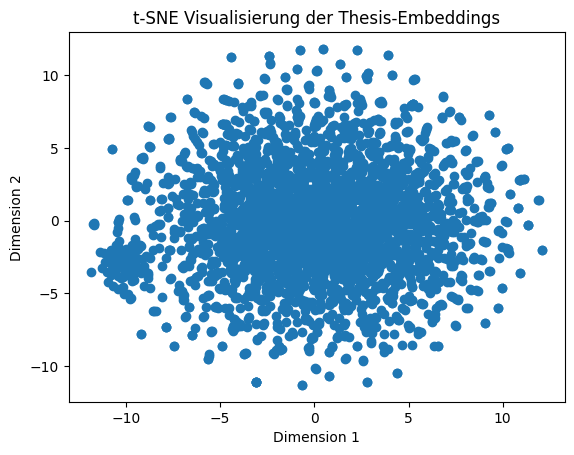

In [52]:
### TODO: 3.2 Visualize the samples in the 2D space.

### YOUR CODE HERE

import matplotlib.pyplot as plt

plt.scatter(thesis_embeddings_2d[:, 0], thesis_embeddings_2d[:, 1])

#for i, thesis in enumerate(dataframe):
#    plt.annotate(" ".join(thesis), (thesis_embeddings_2d[i, 0], thesis_embeddings_2d[i, 1]))

plt.title("t-SNE Visualisierung der Thesis-Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


### END YOUR CODE